Chapter 4 Regularization

reference : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression


เนื่องจากการสร้างแบบจำลอง เช่น Linear regression หรือ Logistic regression ที่ได้เเสดงตัวอย่างมาในบทที่ 2 เเละ 3 พบว่า หากจำนวนคุณลักษณะมีจำนวนมากเกินไปอาจส่งผลให้เกิดปัญหา **overfitting** ได้ ซึ่งวิธีการ Regularization เป็นวิธีที่ใช้ลดผลกระทบ หรือ ลดอิทธิพลของคุณลักษณะลงไปด้วย regularization parameter ($\lambda$) 


ยกตัวอย่างให้ Linear regression model สามารถเเสดงได้โดย 

$y = \theta_0+\theta_1x+\theta_2x^2 +...+\theta_nx^n$

เมื่อ $n$ คือ จำนวนคุณลักษณะ

ดังนั้นการปรับ parameter ด้วยวิธี regularization สามารถ กำหนด cost function โดย
\begin{equation}
Cost\;Function\;:\;\;
J(\theta) = \frac{1}{2m}(\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})^2+\lambda\sum^m_{j=1}\theta^2_j)
\end{equation}

ทดสอบการทำ Reluarization สำหรับ Linear Regression ดังนี้

เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ทดลองสร้างชุดข้อมูลเรียนรู้

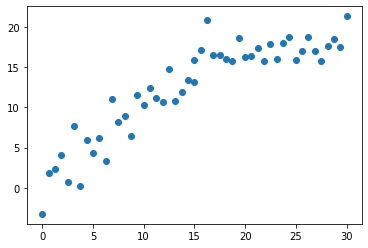

In [2]:
sample = 25
rng = np.random.RandomState(1) # สร้าง object สำหรับการสุ่มข้อมูลโดยกำหนดให้ชื่อ rng
x_train = np.linspace(0, 15, sample)
y_train = x_train - 2* rng.randn(sample)
new_sam = np.linspace(max(x_train),max(x_train)+15, sample)
x_train = np.concatenate((x_train,new_sam))
add_y_train = np.exp(2*rng.rand(sample))
add_y_train += max(y_train)
y_train=np.concatenate((y_train,add_y_train))
plt.scatter(x_train, y_train)

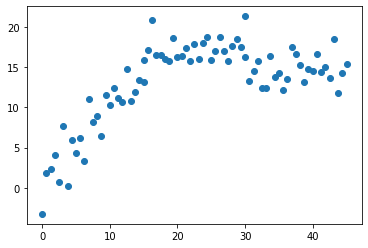

In [3]:
new_sam = np.linspace(max(x_train),max(x_train)+15, sample)
x_train=np.concatenate((x_train,new_sam))
add_y_train = 0.7*max(y_train) - 2* rng.randn(sample)
y_train=np.concatenate((y_train,add_y_train))
plt.scatter(x_train, y_train)

สร้าง Linear regression model โดยกำหนดให้ hypothesis เขียนได้โดย

$h(x)=\theta_{0}+\theta_{1} x$


In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train[:, np.newaxis], y_train)

LinearRegression()

ทดลองเเสดงค่า intercept ($\theta_{0}$) เเละ coefficient ($\theta_{1}$) เมื่อ

$h(x)=\theta_{0}+\theta_{1} x$

In [5]:
print("Model intercept:", model.intercept_)
print("Model coefficient:    ", model.coef_)


Model intercept: 7.507555018324067
Model coefficient:     [0.25145264]


ทดลองเเสดงกราฟของ linear model 

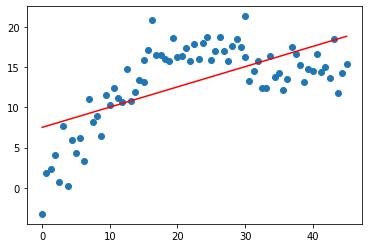

In [6]:
xfit = np.linspace(0, max(x_train), 2*sample)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x_train, y_train)
plt.plot(xfit, yfit,color='red');

สร้าง polynomial regression model โดยกำหนดให้เป็นสมการ order = 6 

**`polynomial regression model`**
$$
{h(x)=\theta _{0}+\theta _{1}x^{1}+\theta _{2}x^{2}+\theta _{3}x^{3}+\cdots +\theta _{6}x^{6}}
$$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
# กำหนดให้สร้างแบบจำลองโดยใช้ polynomial function degree 6
poly = PolynomialFeatures(degree=6) 
x_train_poly = poly.fit_transform(x_train[:, None])
pm = LinearRegression()
pm.fit(x_train_poly, y_train)

LinearRegression()

ทดลองเเสดงค่าพารามิเตอร์ ($\theta_{0}$) ถึง ($\theta_{6}$)

In [8]:
print("Model intercept:", pm.intercept_)
print("Model coefficient:    ", pm.coef_)

Model intercept: -0.8033769835443092
Model coefficient:     [ 0.00000000e+00  1.79933408e+00 -1.69844074e-01  1.67487655e-02
 -8.23557876e-04  1.77284973e-05 -1.37586599e-07]


ทดลองเเสดงกราฟของ nth order polynomial regression model 

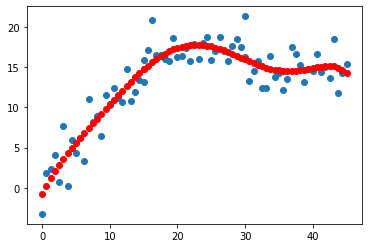

In [9]:
yfit = pm.predict(x_train_poly)
plt.scatter(x_train, y_train)
plt.scatter(x_train, yfit,color='red');

ทดลองสร้างชุดข้อมูลทดสอบ

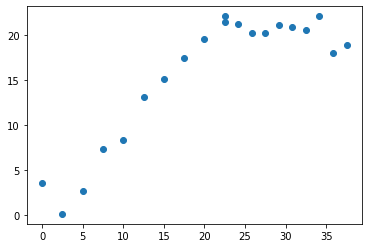

In [10]:
sample_test = 10
x_test = np.linspace(0, max(x_train/2), sample_test)
y_test = x_test - 2.3* rng.randn(sample_test)

new_sam_test = np.linspace(max(x_test),max(x_test)+15, sample_test)
x_test=np.concatenate((x_test,new_sam_test))
add_y_test = y_test[-1] - 1.5* rng.randn(sample_test)
y_test=np.concatenate((y_test,add_y_test))
plt.scatter(x_test, y_test)


ทดสอบประสิทธิภาพของ linear regression model เเละ high order regression model

In [11]:
from sklearn.metrics import mean_squared_error
import math
# Linear Model
y_linear_pred = model.predict(x_test[:, np.newaxis])
print(f'Linear Model = {mean_squared_error(y_linear_pred, y_test)}') 

# polynomial model
x_test_poly = poly.fit_transform(x_test[:, None])
y_poly_pred = pm.predict(x_test_poly)
print(f'Polynomial Model = {mean_squared_error(y_poly_pred, y_test)}') 

Linear Model = 31.968086524989985
Polynomial Model = 13.765253555435407


**Regularization**

ทดลองปรับปรุงแบบจำลองด้วยวิธี Regularization

In [12]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=100)
reg.fit(x_train_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.87019e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=100)

ทดลองเเสดงค่าพารามิเตอร์ ($\theta_{0}$) ถึง ($\theta_{6}$)

In [13]:
# intercept 
print(f'intercept = {reg.intercept_}') # theta0
# coefficient
print(f'coefficient = {reg.coef_}') # theta1 theta2 theta3

intercept = 1.4903053281298497
coefficient = [ 0.00000000e+00  1.12965490e-01  1.44381418e-01 -7.83182319e-03
  1.05930946e-04  8.92974427e-07 -2.04341971e-08]


ทดลองเเสดงกราฟของ regularized polynomial regression model 

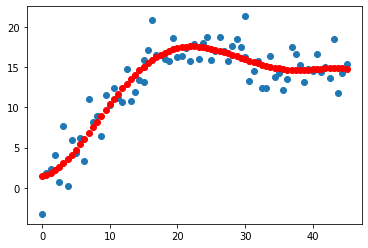

In [14]:
yfit_reg = reg.predict(x_train_poly)
plt.scatter(x_train, y_train)
plt.scatter(x_train, yfit_reg,color='red');

ทดลองเเสดงกราฟเปรียบเทียบแบบจำลองระหว่าง linear regression, polynomial regression เเละ regularized polynomial regression

Text(0.5, 1.0, 'Regularized Polynomial Regression')

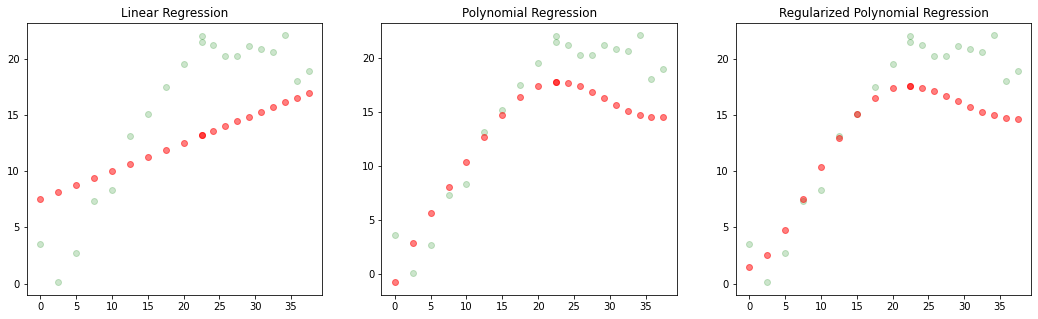

In [15]:
fig = plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(x_test, y_test, color = 'green', alpha=.2)
plt.scatter(x_test, model.predict(x_test[:, np.newaxis]), color = 'red', alpha=.5)
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
plt.scatter(x_test, y_test, color = 'green', alpha=.2)
plt.scatter(x_test, pm.predict(x_test_poly), color = 'red', alpha=.5)
plt.title('Polynomial Regression')

plt.subplot(1, 3, 3)
plt.scatter(x_test, y_test, color = 'green', alpha=.2)
plt.scatter(x_test, reg.predict(x_test_poly), color = 'red', alpha=.5)
plt.title('Regularized Polynomial Regression')

ทดสอบประสิทธิภาพของ regularized polynomial regression model

In [16]:
# Linear Model
print(f'Linear Model = {mean_squared_error(y_linear_pred, y_test)}') 

# polynomial model
print(f'Polynomial Model = {mean_squared_error(y_poly_pred, y_test)}') 

# regularized polynomial model
x_test_poly = poly.fit_transform(x_test[:, None])
y_reg_pred = reg.predict(x_test_poly)
print(f'Regularized Polynomial Model = {mean_squared_error(y_reg_pred, y_test)}') 

Linear Model = 31.968086524989985
Polynomial Model = 13.765253555435407
Regularized Polynomial Model = 12.698301901815139


Regularized logistic regression

In [17]:
# from sklearn.datasets import make_blobs
# from scipy import optimize

In [ ]:
# # plt.title("Three blobs", fontsize='small')
# X, y = make_blobs(n_samples=1000, n_features=2, centers=2,random_state=2, cluster_std=2.5)
# # plt.scatter(X[:, 0], X[:, 1], marker='o');

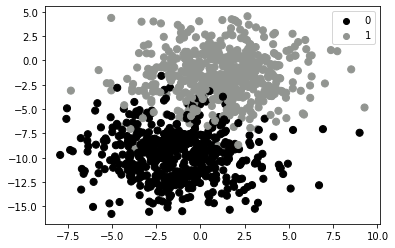

In [ ]:
# colors=np.array(["#000000", "#929591"])
# plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
# for label, c in enumerate(colors):
#     plt.scatter([], [], c=c, label=str(label))
# plt.legend();

In [ ]:
# import pandas as pd

In [ ]:
# data = pd.DataFrame({'X0': X[:, 0],'X1': X[:, 1],'Y': y})
# data

In [ ]:
# positive = data[data['Y'].isin([1])]
# negative = data[data['Y'].isin([0])]

# fig, ax = plt.subplots(figsize=(12,8))
# ax.scatter(positive['X0'], positive['X1'], s=50, c='b', marker='o', label='positive')
# ax.scatter(negative['X0'], negative['X1'], s=50, c='r', marker='x', label='negative')
# ax.legend()
# ax.set_xlabel('X0')
# ax.set_ylabel('X1')

In [ ]:
# X = data.drop(columns=['Y'])
# y = data['Y']
# test_size=.2
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [ ]:
# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression
# X, y = load_iris(return_X_y=True)
# test_size=.2
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

สร้างตัวอย่างชุดข้อมูลสำหรับฝึกฝนและทดสอบ

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [18]:
# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 1000000
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

ทดลองแสดงข้อมูล

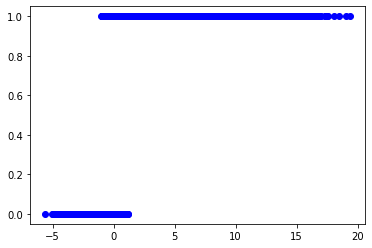

In [19]:
plt.figure()
plt.scatter(X.ravel(), y, color="blue", zorder=20)
X_test = np.linspace(-5, 10, 300)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# # from sklearn.preprocessing import Imputer
# from sklearn.impute import SimpleImputer 
# imr = SimpleImputer(missing_values=np.nan, strategy='mean')

# ##Import Breast Cancer Wisconsin dataset
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header = None)

# X = df.loc[:, 1:10] #features vectors
# y = df.loc[:, 10]   #class labels: 2 = benign, 4 = malignant

# le = LabelEncoder() #positive class = 1 (benign), negative class = 0 (malignant)
# y = le.fit_transform(y)

# #Replace missing feature values with mean feature value
# X = X.replace('?', np.nan)
# # imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imr = imr.fit(X)
# X_imputed = imr.transform(X.values)

# #Split data into training (70%) and testing (30%) sets
# X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size = 0.3, random_state = 1)

# #Z-score normalization
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

ทดสอบประสิทธิภาพของแบบจำลองโดยการปรับค่า $\lambda$

In [20]:
Lambda_acc = []
Lambda = []
for i in range(1, 101, 1):
  mplo = LogisticRegression(C = i/100, penalty='l2')
  mplo.fit(X_train, y_train) 
  Lambda_acc.append(mplo.score(X_train, y_train))
  Lambda.append(1/(i/100))


แสดงผลการทดสอบโดยพล็อตกราฟเทียบระหว่างความถูกต้องและ $\lambda$

In [21]:
import plotly.express as px
fig = px.line(x=Lambda ,y=Lambda_acc)
fig.update_layout(
    title="Regularized logistic regression",
    xaxis_title="$\lambda$",
    yaxis_title="Accuracy",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)
fig.show()

ทดลองเเสดงค่า intercept คือ $\theta _{0}$, $\theta _{1}$ และ  $\theta _{2}$  

In [ ]:
# mplo = LogisticRegression(C=1e6) 
# # mplo = LogisticRegression( penalty='l2')
# mplo.fit(X_train, y_train)

LogisticRegression(C=1000000.0)

In [ ]:
# intercept 
print(f'intercept = {mplo.intercept_}') # theta0
# coefficient
print(f'coefficient = {mplo.coef_}') # theta1 theta2 theta3

intercept = [-4.74217972]
coefficient = [[ 0.44037476  0.24107966  0.67092681  0.14570048  0.2235423   0.65486335
   0.42480767  0.16735018  0.54919596 13.20892246]]


ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า $R^2$

In [ ]:
R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
print(f'R_squared_error_training = {R_squred_train}') 

R_squared_error_training = 1.0


In [ ]:
mplo = LogisticRegression(C = 1e6, penalty='l2')
mplo.fit(X_train, y_train)
print(f'R_squared_error_training = {mplo.score(X_train, y_train)}') 

regmplo = LogisticRegression(C = 0.01, penalty='l2')
regmplo.fit(X_train, y_train)
print(f'R_squared_error_training = {regmplo.score(X_train, y_train)}') 

R_squared_error_training = 0.95858375
R_squared_error_training = 0.95864875


K-fold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(mplo , X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.960 (0.011)


In [ ]:
y_pred = mplo.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1])

Regularization

In [ ]:
model_reg = LogisticRegression(penalty='l2', C=1.0)
model_reg.fit(X_train, y_train)

LogisticRegression()

ทดลองเเสดงค่า intercept คือ $\theta _{0}$, $\theta _{1}$ และ  $\theta _{2}$  

In [ ]:
# intercept 
print(f'intercept = {model_reg.intercept_}') # theta0
# coefficient
print(f'coefficient = {model_reg.coef_}') # theta1 theta2 theta3

intercept = [7.56474843]
coefficient = [[0.42602229 1.38014065]]


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(model_reg , X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.960 (0.011)


In [ ]:
y_pred = mplo.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'accuracy= {acc}') 

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Setup the hyperparameter grid
# c_space = np.logspace(-5, 8, 15)
# param_grid = {'C':c_space}

# # Instantiate a logistic regression classifier: logreg
# logreg = LogisticRegression(max_iter=1000)

# # Instantiate the GridSearchCV object: logreg_cv
# logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# # Fit it to the data
# logreg_cv.fit(X, y)

# # Print the tuned parameters and score
# print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
# print("Best score is {}".format(logreg_cv.best_score_))